In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dog-breed-identification

dog-breed-identification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile


dataset = '/content/dog-breed-identification.zip'

with ZipFile (dataset,'r') as zip:
  zip.extractall()
  print('Extracted successfully')

Extracted successfully


In [5]:
import os
# Printing Names
file_names = os.listdir('/content/train')
print(file_names)

['c925c6050b9846ea6c7f8a9e1314c07c.jpg', '2b5c0c29ae9783290d924b2f8d365466.jpg', '16df5020c2b6ac3f70fb3a5c27c5175e.jpg', '896ae4eda6310c5fa223131ac7574494.jpg', 'c8caed58369e7cbd1af1d57ed8499220.jpg', '76f332f9bc92a0ede6185410b21065ba.jpg', '6640360f7db7c2a66818400cb9a290c0.jpg', 'cb00be608d3c2559eb807386e3c84e1d.jpg', '7f63e3a6abc3ec3e0fd937ee99897f19.jpg', '0eaea4c6fe055607ed8322db0306285f.jpg', '45f35f209231efc1baebf0729ba4e01f.jpg', 'bffe7f9c91a8af465f928a33aa8beda8.jpg', 'db5cfed638eaaa1e627f620830129952.jpg', '169db2d825a1bdeb5a576ab746812936.jpg', 'd299001b203489dc596f75dd865ab24e.jpg', 'f6bdbf94ffea753f4f7638784faf01cc.jpg', 'df878b8c7162cab57b3f9e32c595b05f.jpg', '69f0ad7b0b8ca686c1636067726a05e2.jpg', 'd0441db03224b15c47422e6bdf351a52.jpg', '87b33815ce34f2c2d98b2374c32ce3a5.jpg', '925b987166c0bac0a7ed760473bf7e65.jpg', 'cce1d5b417e2aa8afade8664a84d4576.jpg', '0326d40cc2b35521f1f3e73cabcf2a23.jpg', '93ef939778971c7e2892360ff61eec17.jpg', '1e5ce138280eabd214664398f19491b3.jpg',

In [6]:
#Importing Libraries

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

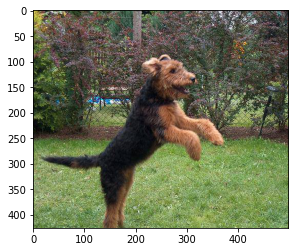

In [7]:
img = mpimg.imread('/content/train/3adb3fb45e6331c8905cb6cf85db9f11.jpg')
plt.imshow(img)

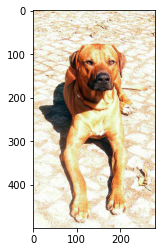

In [8]:
img = mpimg.imread('/content/train/0518691772e78ac6805bf006993665a4.jpg')
plt.imshow(img)

In [10]:
os.mkdir('/content/image resized')

In [11]:
from pyparsing import original_text_for
original_folder = '/content/train/'
resized_folder = '/content/image resized/'


for i in range(2000):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder+filename

  img = Image.open(image_path)
  img = img.resize((227,227))
  img = img.convert('RGB')


  newImgPath = resized_folder+filename
  img.save(newImgPath)

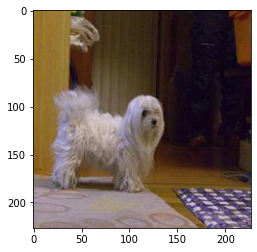

In [12]:
#Displaying resized dog image
img = mpimg.imread('/content/image resized/7742f1ede5c9e95b93dcbaee009f6e87.jpg')
plt.imshow(img)

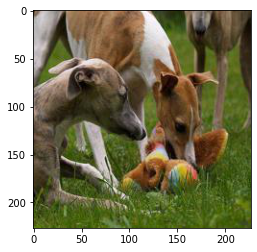

In [13]:
#Displaying resized dog image
img = mpimg.imread('/content/image resized/2b5c0c29ae9783290d924b2f8d365466.jpg')
plt.imshow(img)

In [14]:
import os
import pandas as pd
path = '/content/train'
train_path = os.path.join(path,"/content/train/")
labels_path = os.path.join(path,"/content/labels.csv")
resized_path = os.path.join(path,"/content/image resized")


In [15]:
# Get a list of all image files in the resized image folder
image_files = os.listdir(resized_path)

# Extract the image IDs from the file names
image_ids = [filename.split('.')[0] for filename in image_files]

# Load the labels CSV file and filter it to only include labels for the image IDs in the resized image folder
labels_df = pd.read_csv(labels_path)
labels_df = labels_df[labels_df['id'].isin(image_ids)]

# Print out the number of images and labels found
print("Number of images found:", len(image_ids))
print("Number of labels found:", len(labels_df))

# Print out the image and label IDs
print("Image IDs:", image_ids)
print("Label IDs:", list(labels_df['id']))


Number of images found: 2000
Number of labels found: 2000
Image IDs: ['c925c6050b9846ea6c7f8a9e1314c07c', '2b5c0c29ae9783290d924b2f8d365466', '16df5020c2b6ac3f70fb3a5c27c5175e', '896ae4eda6310c5fa223131ac7574494', 'c8caed58369e7cbd1af1d57ed8499220', '76f332f9bc92a0ede6185410b21065ba', '6640360f7db7c2a66818400cb9a290c0', 'cb00be608d3c2559eb807386e3c84e1d', '7f63e3a6abc3ec3e0fd937ee99897f19', '0eaea4c6fe055607ed8322db0306285f', '45f35f209231efc1baebf0729ba4e01f', 'bffe7f9c91a8af465f928a33aa8beda8', 'db5cfed638eaaa1e627f620830129952', '169db2d825a1bdeb5a576ab746812936', 'd299001b203489dc596f75dd865ab24e', 'f6bdbf94ffea753f4f7638784faf01cc', 'df878b8c7162cab57b3f9e32c595b05f', '69f0ad7b0b8ca686c1636067726a05e2', 'd0441db03224b15c47422e6bdf351a52', '87b33815ce34f2c2d98b2374c32ce3a5', '925b987166c0bac0a7ed760473bf7e65', 'cce1d5b417e2aa8afade8664a84d4576', '0326d40cc2b35521f1f3e73cabcf2a23', '93ef939778971c7e2892360ff61eec17', '1e5ce138280eabd214664398f19491b3', 'f3e1cc6183fe3457dd644320d730b

In [16]:
labels_df


,id,breed
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
7,002a283a315af96eaea0e28e7163b21b,borzoi
16,007b5a16db9d9ff9d7ad39982703e429,wire-haired_fox_terrier
19,008887054b18ba3c7601792b6a453cc3,boxer
25,00a366d4b4a9bbb6c8a63126697b7656,golden_retriever
...,...,...
10133,fdc0556f9b32a714b56985eb99fbbbeb,silky_terrier
10161,fe624532170510bd80627c0500bafc97,tibetan_mastiff
10164,fe78fc42e32174c7178b572bdcf5a129,otterhound
10202,ff8e3fa7e04faca99af85195507ee54d,sealyham_terrier


In [17]:
breed = labels_df["breed"].unique()
breed


array(['dingo', 'borzoi', 'wire-haired_fox_terrier', 'boxer',
       'golden_retriever', 'irish_water_spaniel', 'labrador_retriever',
       'giant_schnauzer', 'groenendael', 'greater_swiss_mountain_dog',
       'brittany_spaniel', 'english_setter', 'border_collie', 'collie',
       'weimaraner', 'entlebucher', 'leonberg', 'saluki',
       'miniature_schnauzer', 'pekinese', 'lakeland_terrier',
       'irish_setter', 'scotch_terrier', 'cairn', 'afghan_hound',
       'bedlington_terrier', 'maltese_dog', 'bernese_mountain_dog',
       'american_staffordshire_terrier', 'soft-coated_wheaten_terrier',
       'clumber', 'siberian_husky', 'briard', 'chesapeake_bay_retriever',
       'dandie_dinmont', 'basset', 'rhodesian_ridgeback',
       'kerry_blue_terrier', 'australian_terrier', 'english_foxhound',
       'african_hunting_dog', 'appenzeller', 'standard_schnauzer',
       'standard_poodle', 'flat-coated_retriever', 'basenji', 'kuvasz',
       'whippet', 'pomeranian', 'curly-coated_retriever

In [18]:
num_classes = len(breed)
num_classes


120

In [19]:
#One hot encoding of breed
from glob import glob
import numpy as np

breed2id = {name: i for i, name in enumerate(breed)}
ids = glob(resized_path + '/*.jpg')
labels = []

print("Number of images found:", len(ids))

for image_path in ids:
    image_id = image_path.split("/")[-1].split(".")[0]
    breed_name = None
    try:
        breed_name = list(labels_df[labels_df.id==image_id]["breed"])[0]
    except IndexError:
        pass
    if breed_name is not None and breed_name in breed2id:
        breed_index = breed2id[breed_name]
        labels.append(breed_index)
    else:
        labels.append(np.nan) # or some other default value

print("Number of labels found:", len(labels))
        
labels = np.array(labels)
labels = np.where(np.isnan(labels), 0, labels) # replace NaN with 0
labels_onehot = np.zeros((labels.shape[0], num_classes))
labels_onehot[np.arange(labels.shape[0]), labels.astype(int)] = 1



Number of images found: 2000
Number of labels found: 2000


In [20]:
print(ids)
print(labels)


['/content/image resized/c925c6050b9846ea6c7f8a9e1314c07c.jpg', '/content/image resized/2b5c0c29ae9783290d924b2f8d365466.jpg', '/content/image resized/16df5020c2b6ac3f70fb3a5c27c5175e.jpg', '/content/image resized/896ae4eda6310c5fa223131ac7574494.jpg', '/content/image resized/c8caed58369e7cbd1af1d57ed8499220.jpg', '/content/image resized/76f332f9bc92a0ede6185410b21065ba.jpg', '/content/image resized/6640360f7db7c2a66818400cb9a290c0.jpg', '/content/image resized/cb00be608d3c2559eb807386e3c84e1d.jpg', '/content/image resized/7f63e3a6abc3ec3e0fd937ee99897f19.jpg', '/content/image resized/0eaea4c6fe055607ed8322db0306285f.jpg', '/content/image resized/45f35f209231efc1baebf0729ba4e01f.jpg', '/content/image resized/bffe7f9c91a8af465f928a33aa8beda8.jpg', '/content/image resized/db5cfed638eaaa1e627f620830129952.jpg', '/content/image resized/169db2d825a1bdeb5a576ab746812936.jpg', '/content/image resized/d299001b203489dc596f75dd865ab24e.jpg', '/content/image resized/f6bdbf94ffea753f4f7638784faf01

In [21]:
print(labels_onehot[0:10])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
import cv2
import glob
image_directory = '/content/image resized/'
image_extension = ['png','jpg']


files = []
[files.extend(glob.glob(image_directory + '*.' + e))for e in image_extension]


dog_breed_images = np.asarray([cv2.imread(file) for file in files])

In [23]:
print(dog_breed_images)

[[[[ 60  83  78]
   [145 168 163]
   [127 146 143]
   ...
   [ 57  69  79]
   [ 50  59  69]
   [ 42  51  61]]

  [[ 42  64  59]
   [ 83 105 100]
   [ 62  82  77]
   ...
   [ 57  69  79]
   [ 49  59  69]
   [ 41  51  61]]

  [[ 29  50  42]
   [ 29  50  42]
   [ 17  35  28]
   ...
   [ 57  72  81]
   [ 48  60  70]
   [ 41  53  63]]

  ...

  [[209 208 194]
   [200 199 185]
   [199 198 184]
   ...
   [152 156 151]
   [149 153 148]
   [146 150 145]]

  [[211 208 194]
   [202 199 185]
   [200 197 183]
   ...
   [152 156 151]
   [149 153 148]
   [146 150 145]]

  [[212 209 195]
   [202 199 185]
   [198 195 181]
   ...
   [152 156 151]
   [150 154 149]
   [147 151 146]]]


 [[[ 23  50  76]
   [ 30  55  81]
   [ 81 105 129]
   ...
   [ 48  70  82]
   [ 44  68  80]
   [ 43  67  79]]

  [[ 24  49  75]
   [ 40  66  90]
   [ 90 112 137]
   ...
   [ 38  60  71]
   [ 34  58  70]
   [ 34  56  68]]

  [[ 29  53  77]
   [ 58  81 103]
   [ 98 119 141]
   ...
   [ 35  55  66]
   [ 30  52  63]
   [ 29  49

In [24]:
print(dog_breed_images.shape)

(2000, 227, 227, 3)


In [25]:
print(labels_onehot.shape)

(2000, 120)


Classification of Dog Breeds

In [26]:
X = dog_breed_images
Y = np.asarray(labels_onehot)

In [27]:
X.shape

(2000, 227, 227, 3)

In [28]:
Y.shape

(2000, 120)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
print(X.shape, X_train.shape,X_test.shape)


(2000, 227, 227, 3) (1600, 227, 227, 3) (400, 227, 227, 3)


In [31]:
# Scaling the Data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
# Define the AlexNet model architecture
model = keras.Sequential(
    [
        # convolutional layer of size 11*11 with 96 filters, stride of 4 is applied on input layer of 224*224*3
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation="relu", input_shape=(227, 227, 3)),
        # Max Pooling layer of size 3*3 with stride of 2
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
      # convolutional layer of size 5*5 with 256 filters, padding of same
        layers.Conv2D(256, (5, 5), activation="relu", padding="same"),
     # Max Pooling layer of size 3*3 with stride of 2
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
     # convolutional layer of size 3*3 with 384 filters
        layers.Conv2D(384, (3, 3), activation="relu", padding="same"),
     # convolutional layer of size 3*3 with 384 filters
        layers.Conv2D(384, (3, 3), activation="relu", padding="same"),
     # convolutional layer of size 3*3 with 256 filters
        layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
     # Max Pooling layer of size 3*3 with stride of 2
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
     # Flattened the layer
        layers.Flatten(),
      # Each layer had 4096 nodes
        layers.Dense(4096, activation="relu"),
        layers.Dropout(0.5),
     # Each layer had 4096 nodes
        layers.Dense(4096, activation="relu"),
        layers.Dropout(0.5),
     # Output Layer with activation function Sigmoid and output nodes = 120
        layers.Dense(120, activation="softmax"),
    ]
)

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 384)      

In [42]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [43]:
model.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
200/200 [==============================] - 9s 33ms/step - loss: 28665.7031 - accuracy: 0.0063 - val_loss: 4.8031 - val_accuracy: 0.0025
Epoch 2/20
200/200 [==============================] - 6s 28ms/step - loss: 4.7798 - accuracy: 0.0094 - val_loss: 4.8035 - val_accuracy: 0.0100
Epoch 3/20
200/200 [==============================] - 6s 29ms/step - loss: 4.7701 - accuracy: 0.0094 - val_loss: 4.8099 - val_accuracy: 0.0100
Epoch 4/20
200/200 [==============================] - 6s 30ms/step - loss: 4.7640 - accuracy: 0.0081 - val_loss: 4.8172 - val_accuracy: 0.0075
Epoch 5/20
200/200 [==============================] - 6s 29ms/step - loss: 4.7606 - accuracy: 0.0113 - val_loss: 4.8278 - val_accuracy: 0.0075
Epoch 6/20
200/200 [==============================] - 6s 30ms/step - loss: 4.7591 - accuracy: 0.0100 - val_loss: 4.8348 - val_accuracy: 0.0100
Epoch 7/20
200/200 [==============================] - 6s 28ms/step - loss: 4.7600 - accuracy: 0.0125 - val_loss: 4.8292 - val_accuracy: 0.

Prediction Of Dogs Breeds

Path of image to be predicted:/content/Borzoi.jpg


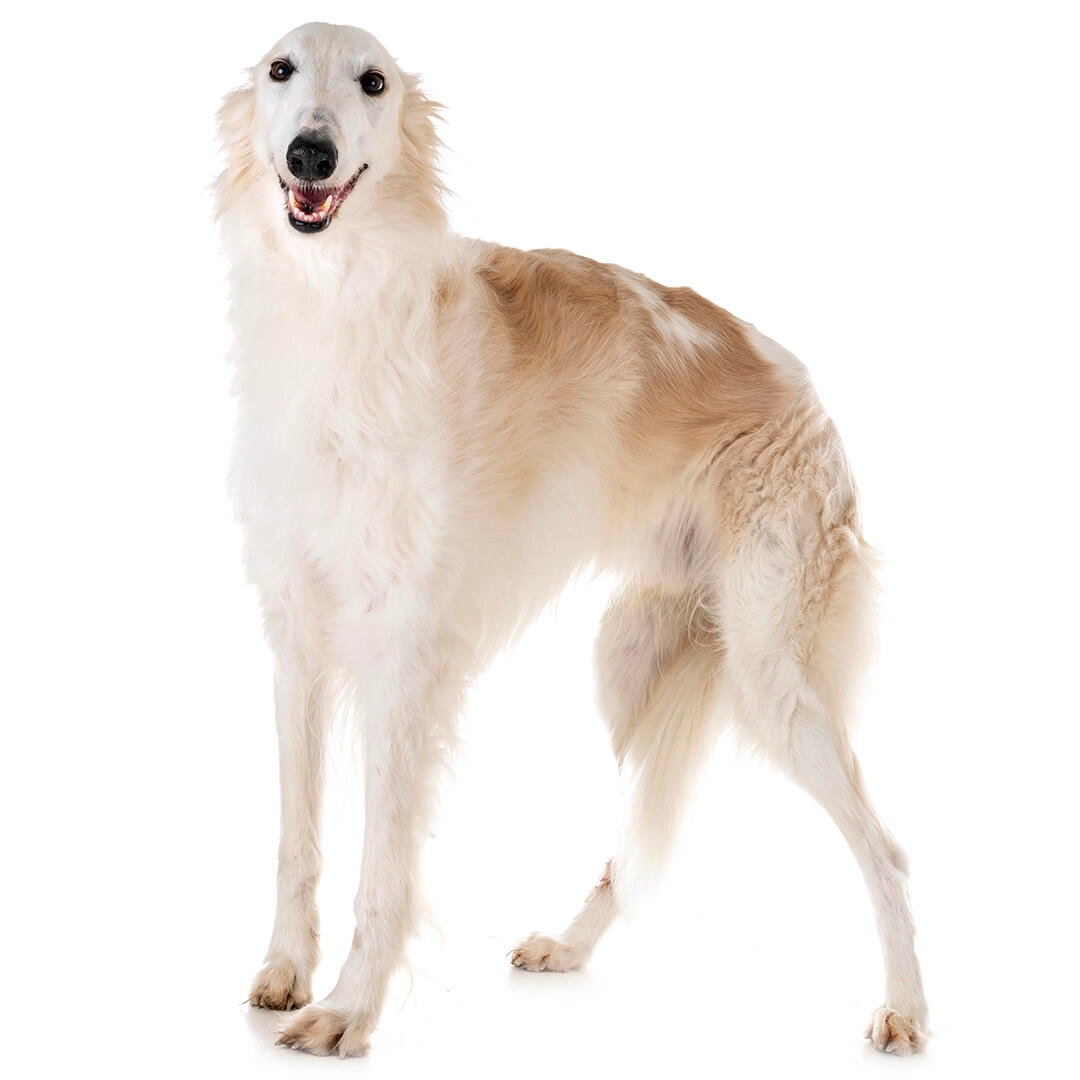

1/1 [==============================] - 0s 123ms/step
Predicted breed: whippet


In [44]:
breed_names = ['dingo', 'borzoi', 'wire-haired_fox_terrier', 'boxer',
       'golden_retriever', 'irish_water_spaniel', 'labrador_retriever',
       'giant_schnauzer', 'groenendael', 'greater_swiss_mountain_dog',
       'brittany_spaniel', 'english_setter', 'border_collie', 'collie',
       'weimaraner', 'entlebucher', 'leonberg', 'saluki',
       'miniature_schnauzer', 'pekinese', 'lakeland_terrier',
       'irish_setter', 'scotch_terrier', 'cairn', 'afghan_hound',
       'bedlington_terrier', 'maltese_dog', 'bernese_mountain_dog',
       'american_staffordshire_terrier', 'soft-coated_wheaten_terrier',
       'clumber', 'siberian_husky', 'briard', 'chesapeake_bay_retriever',
       'dandie_dinmont', 'basset', 'rhodesian_ridgeback',
       'kerry_blue_terrier', 'australian_terrier', 'english_foxhound',
       'african_hunting_dog', 'appenzeller', 'standard_schnauzer',
       'standard_poodle', 'flat-coated_retriever', 'basenji', 'kuvasz',
       'whippet', 'pomeranian', 'curly-coated_retriever',
       'shetland_sheepdog', 'papillon', 'miniature_pinscher',
       'great_dane', 'shih-tzu', 'blenheim_spaniel', 'komondor',
       'sussex_spaniel', 'great_pyrenees', 'bloodhound',
       'german_short-haired_pointer', 'redbone', 'walker_hound',
       'mexican_hairless', 'cardigan', 'keeshond', 'tibetan_mastiff',
       'tibetan_terrier', 'italian_greyhound', 'malamute', 'boston_bull',
       'newfoundland', 'ibizan_hound', 'otterhound', 'chow', 'pembroke',
       'cocker_spaniel', 'gordon_setter', 'pug', 'miniature_poodle',
       'old_english_sheepdog', 'norwegian_elkhound', 'bluetick',
       'airedale', 'toy_poodle', 'scottish_deerhound', 'border_terrier',
       'chihuahua', 'silky_terrier', 'samoyed', 'affenpinscher',
       'norwich_terrier', 'staffordshire_bullterrier', 'schipperke',
       'yorkshire_terrier', 'vizsla', 'lhasa', 'norfolk_terrier',
       'french_bulldog', 'bouvier_des_flandres', 'malinois',
       'japanese_spaniel', 'brabancon_griffon', 'irish_wolfhound',
       'eskimo_dog', 'doberman', 'english_springer', 'sealyham_terrier',
       'bull_mastiff', 'dhole', 'black-and-tan_coonhound', 'toy_terrier',
       'rottweiler', 'kelpie', 'irish_terrier',
       'west_highland_white_terrier', 'beagle', 'saint_bernard',
       'german_shepherd', 'welsh_springer_spaniel']
input_image_path = input("Path of image to be predicted:" )
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(227,227))
input_image_scaled = input_image_resize/255
input_reshaped = np.reshape(input_image_scaled,[1,227,227,3])
input_prediction = model.predict(input_reshaped)
input_pred_label = np.argmax(input_prediction)
breed_prediction = breed_names[input_pred_label]
print('Predicted breed:', breed_prediction)
